<center>

# **Clustering**

</center>

### **The task list**

<div align='center'>

| **No.** | **Details** | **Evaluation** |
| --- | --- | --- |
| 1 | Understand the working principles of clustering algorithms | 100%  |
| 2 | Implement clustering algorithms using Python libraries (e.g., `scikit-learn`, `scipy`) | 100% |
| 3 | Analyze the results to derive meaningful insights from clustering outcomes | 100% |
| 4 | Partitioning approach: K-means | 100%  | 
| 4.1 | Perform K-means clustering for different values of k (1 $\leq$ k $\leq$ 10) | 100% |
| 4.2 | For each value of k, compute and display the **inertia** | 100% | 
| 4.3 | Find the optimal number of clusters by applying the **Elbow Method** and explain your choice | 100% |
| 4.4 | Using the optimal k, visualize the resulting clusters on three dimensions using **PCA** | 100% | 
| 5 | Hierarchical Method: Agglomerative Clustering | 100% |
| 5.1 | Perform clustering using Agglomerative Clustering and experiment with different linkage (`ward`, `average`, `complete`, `single`) | 100% |
| 5.2 | Visualize the resulting clusters for each linkage method and provide your insights based on the observed outcomes | 100% |
| 5.3 | Create a dendrogram to visualize the clustering hierarchy using any linkage method | 100% |
| 5.4 | Discuss the insights and information that can be derived from the dendrogram | 100% |
| 6 | Density-Based: DBSCAN | 100% |
| 6.1 | Use the DBSCAN to detect clusters and noise in the data | 100% |
| 6.2 | Experiment with different values for the parameters `eps` (the radius of the neighborhood) and `min_samples` (the minimum number of points required to form a cluster) | 100% |
| 6.3 | Visualize the resulting clusters and noise points | 100% |

</div>

**Import necessary libraries**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

**Load the Wine dataset**

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
print("Dataset shape:", X.shape)
print("Features:", wine.feature_names)

Dataset shape: (178, 13)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


# **K-Means Clustering**

**The task list**

1. Perform K-Means clustering for different values of k (1 $\leq$ k $\leq$ 10)
2. For each value of k, compute and display the **inertia** 
3. Find the optimal number of clusters by applying the **Elbow Method** and explain your choice
4. Using the optimal k, visualize the resulting clusters on three dimensions using **PCA**

In [4]:
# Perform K-Means for k from 1 to 10 and compute inertia
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

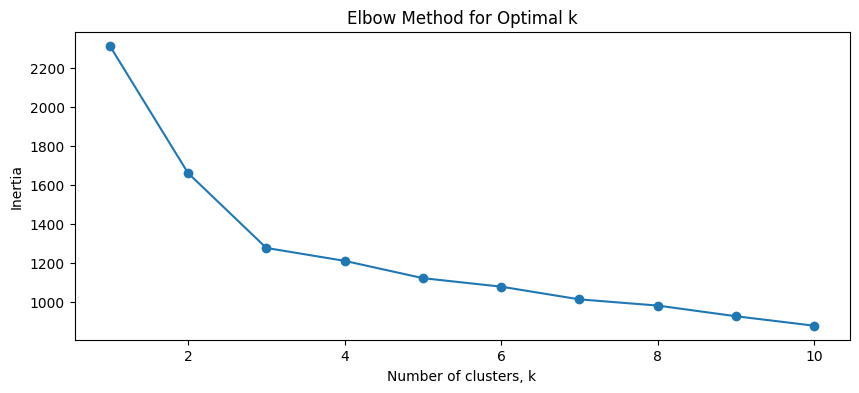

In [5]:
# Plot the elbow curve
plt.figure(figsize=(10, 4))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

**Comments** 

My optimal choice is **k = 3** because the elbow curve shows a sharp decrease in inertia up to **k = 3** (from $\approx$ 2300 to $\approx$ 1250) with a significant slowdown afterward (drop to $\approx$ 1200 at **k = 4**) $\Rightarrow$ Diminishing returns beyond 3 clusters.

In [6]:
# Use optimal k=3 and visualize in 3D using PCA and apply PCA to reduce to 3 dimensions
k = 3 

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

kmeans_optimal = KMeans(n_clusters=k, random_state=42)
clusters = kmeans_optimal.fit_predict(X_pca)

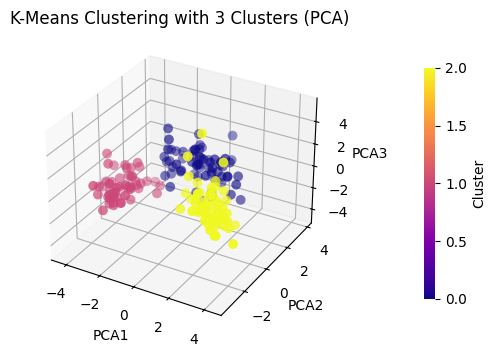

In [7]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='plasma', s=50, edgecolors='none')  # Plasma colormap, no point outlines
ax.set_title('K-Means Clustering with 3 Clusters (PCA)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

cbar = plt.colorbar(scatter, pad=0.2, shrink=0.5, label='Cluster')
cbar.outline.set_visible(False) 
cbar.set_ticks([0, 0.5, 1, 1.5, 2])

plt.show()

# **Agglomerative Clustering**

**The task list**

1. Perform clustering using Agglomerative Clustering and experiment with different linkage (`ward`, `average`, `complete`, `single`) 
2. Visualize the resulting clusters for each linkage method and provide your insights based on the observed outcomes
3. Create a dendrogram to visualize the clustering hierarchy using any linkage method 
4. Discuss the insights and information that can be derived from the dendrogram 

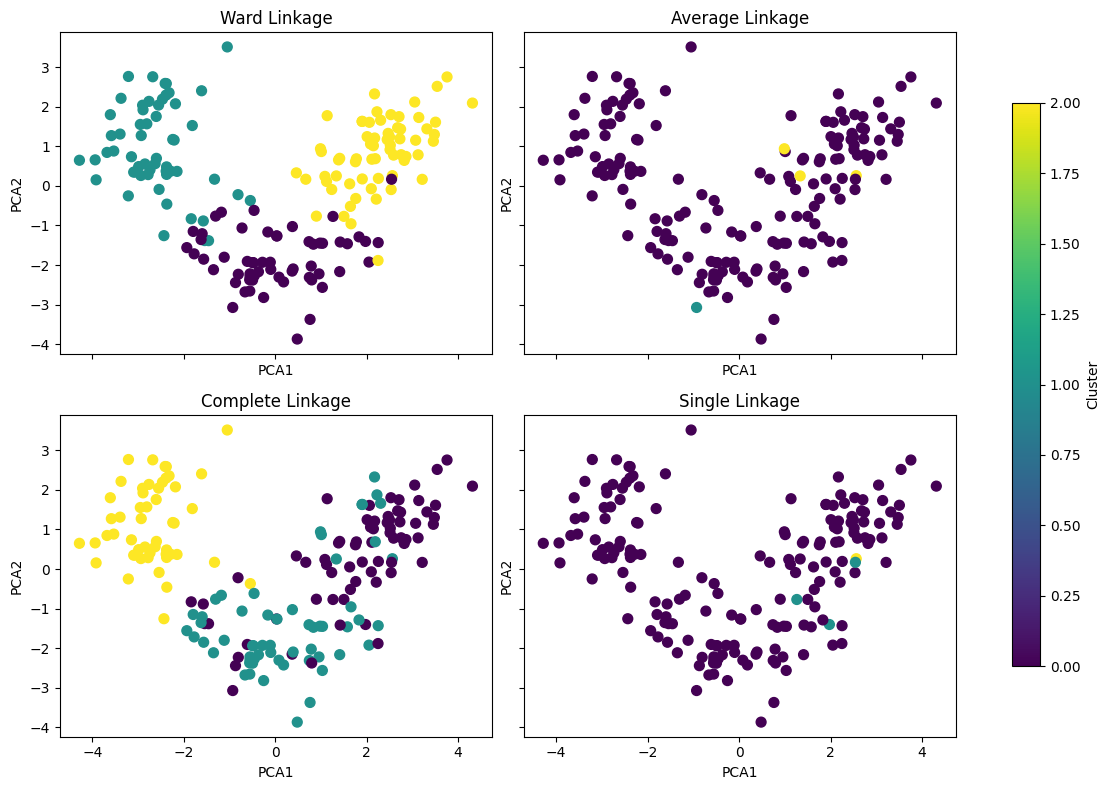

In [37]:
# Perform clustering with different linkage methods and then apply PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

linkage_methods = ['ward', 'average', 'complete', 'single']
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for idx, link_method in enumerate(linkage_methods): 
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=link_method)
    clusters = agg_clustering.fit_predict(X_scaled)
    
    scatter = axes[idx].scatter(X_pca_2d[:, 0], - X_pca_2d[:, 1], c=clusters, cmap='viridis', s=50)
    axes[idx].set_title(f'{link_method.capitalize()} Linkage')
    axes[idx].set_xlabel('PCA1')
    axes[idx].set_ylabel('PCA2')

plt.tight_layout()
fig.colorbar(scatter, ax=axes, label='Cluster', shrink=0.8, pad=0.05)
plt.show()

**Comments** 

With the **ward linkage**, the clear and well-separated clusters are visible so it captures effectively the structure and variance in the data (minimizing within-cluster variance) and same with **ward linkage**, the **complete linkage** produces distinct and reasonably balanced clusters and shows the good separation by avoiding chaining and captures compact clusters well.

Opposite with it, the **average linkage** clustering fails with almost all points assigned to one cluster and the reason maybe is it's too conservative for this dataset and merging clusters too early and ignoring natural groupings. Same with it, **single linkage** also performs poorly with nearly all points placed in one cluster ('chaining effect' - where distant points get linked through intermediary ones)

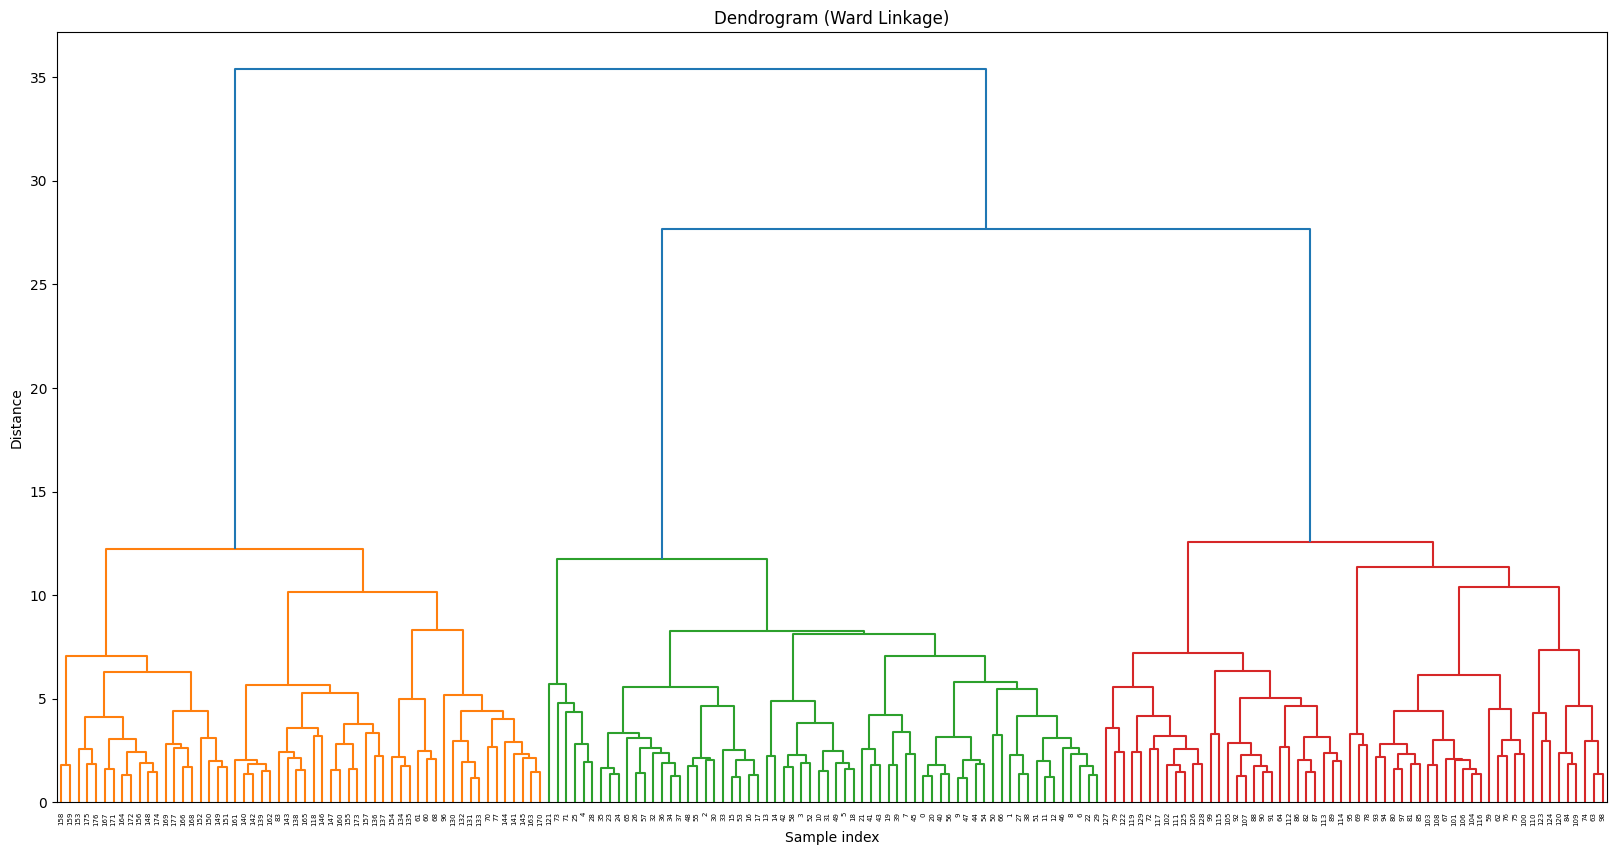

In [25]:
# Dendrogram using ward linkage
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

**Comments**

The dendrogram using **ward linkage** reveals a clear hierarchical structure with three dominant clusters, formed at higher linkage distances around 25–35. 

This supports the earlier choice of using three clusters and most merges happen at lower heights (many data points are closely related and form compact groups). 

The balanced branching suggests the dataset is well-structured with minimal noise or outliers.

# **DBSCAN**

**The task list**

1. Use the DBSCAN to detect clusters and noise in the data |
2. Experiment with different values for the parameters `eps` (the radius of the neighborhood) and `min_samples` (the minimum number of points required to form a cluster)
3. Visualize the resulting clusters and noise points 
4. Answer: How does the change in eps and min_samples affect the density necessary to form a cluster?

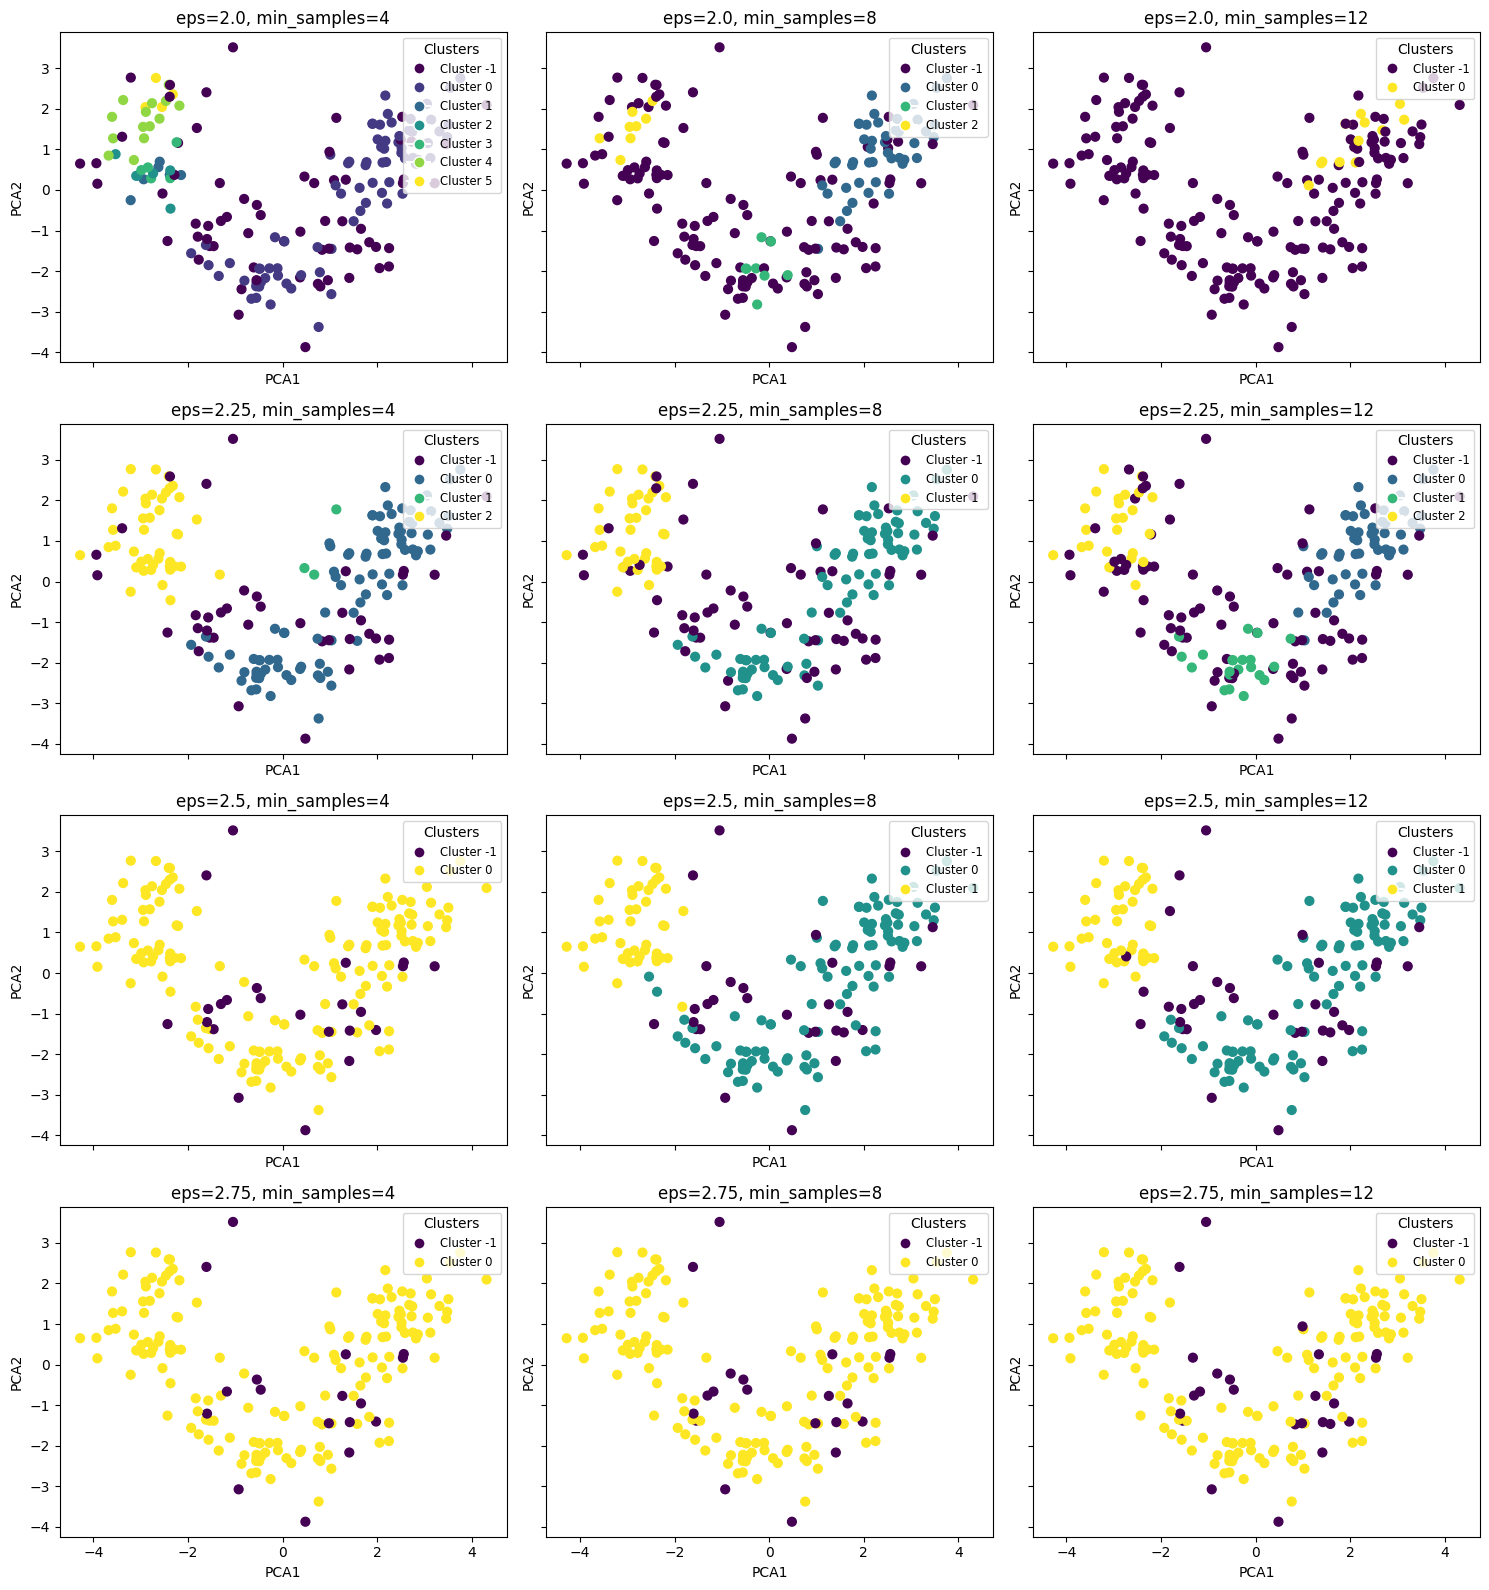

In [38]:
eps_values = [2.0, 2.25, 2.5, 2.75]
min_samples_values = [4, 8, 12]

fig, axes = plt.subplots(4, 3, figsize=(15, 16), sharex=True, sharey=True)
axes = axes.flatten()

idx = 0
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)

        ax = axes[idx]
        scatter = ax.scatter(
            X_pca_2d[:, 0],
            - X_pca_2d[:, 1],
            c=clusters,
            cmap='viridis',
            s=40,
            label=np.unique(clusters)
        )

        # Create legend entries
        handles = []
        labels = []
        for cluster_id in np.unique(clusters):
            color = scatter.cmap(scatter.norm(cluster_id))
            handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster_id}',
                                      markerfacecolor=color, markersize=8))
            labels.append(f'Cluster {cluster_id}')
        ax.legend(handles=handles, title="Clusters", loc='upper right', fontsize='small')

        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('PCA1')
        ax.set_ylabel('PCA2')
        idx += 1

plt.tight_layout()
plt.show()

**Comments**

In DBSCAN, the parameters **eps** and **min_samples** control how dense a region must be to qualify as a cluster. When increasing **eps** makes it easier to form clusters by expanding the neighborhood radius and often resulting in fewer, larger clusters and less noise. 

In contrast, increasing **min_samples** raises the density threshold and making it harder to form clusters and leading to more noise. 

Lower values of **min_samples** and moderate **eps** allow more flexible, finer-grained clustering. 